In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
weight = 0.7
bias = 0.3

In [3]:
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step)
X

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [4]:
X = X.unsqueeze(dim = 1)
X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [5]:
y = weight * X + bias
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [6]:
X.size(), y.size()

(torch.Size([50, 1]), torch.Size([50, 1]))

## Split into train and test set

In [29]:
train_split = int( 0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
X_train.size(), y_train.size(), X_test.size(), y_test.size()

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

#### Using matplotlib to visualize the data

In [8]:
def plot_predictions(train_data = X_train,
                     test_data = X_test,
                     train_labels = y_train,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize = (10, 6))
    plt.scatter(train_data, train_labels, c = "b", label = "Training data")

    plt.scatter(test_data, test_labels, c = "g", label = "Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c = "r", label = "Predictions")

    plt.legend()

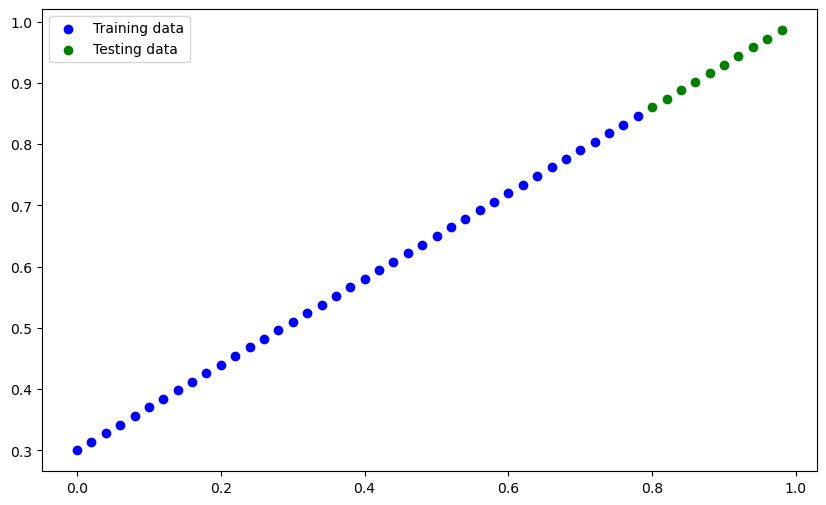

In [9]:
plot_predictions()

#### Building the model

In [10]:
class LinerRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x:torch.Tensor) -> torch.Tensor: ## X is training data
        return self.weights * x + self.bias

#### Checking the contents of out pytorch model

In [11]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

model_0 = LinerRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### Making predictions using torch.inference()

* To check our model's predictive power, lets see how well it predicts `y_test` based on `x_test`.
* When we pass our data thtrough the model, it is going to run through the `forward` method 
* We can also get the grads by simply running the model as well.
* But, we use the inference mode so that pytorch will not keep track of the grads and will in turn run faster

In [13]:
with torch.inference_mode():
    y_preds = model_0(X_test)


# Both inefrence_mode and no_grad() do the same thing, but inference_mode is preferred. While no_grad() stops tracking gradients, 
# it still involves some overhead from PyTorch's Autograd engine, especially with operations that could modify the computation graph.
# In contrast, torch.inference_mode() completely disables Autograd, which can provide a performance boost for inference.

# with torch.no_grad():
#     y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

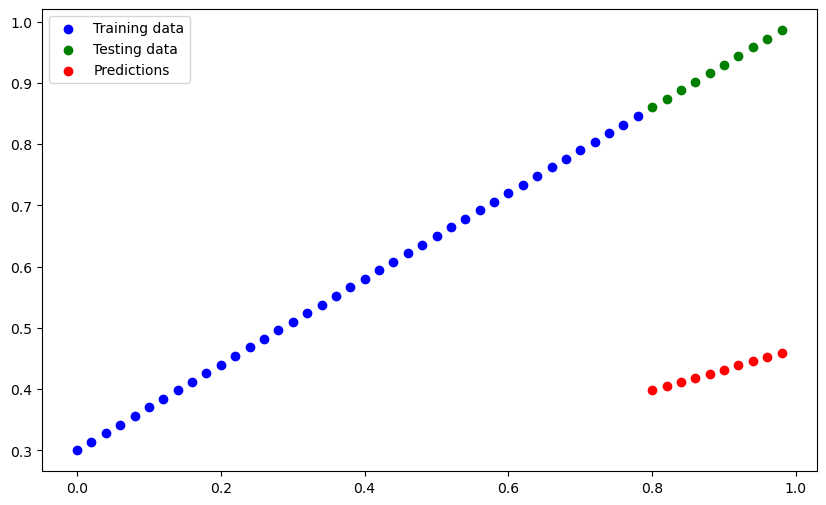

In [14]:
plot_predictions(predictions = y_preds)

## Train Model

* Loss Functions
* Optimizers

#### Loss Functions

In [15]:
# setup a loss function

loss_fn = nn.MSELoss()

# setup an optimizer

optimizer = torch.optim.Adam(model_0.parameters(), lr = 0.01)

In [16]:
loss_fn

MSELoss()

In [17]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

## Setting up a training loop

1. **Loop through the data**: through epochs and batches
2. **Forward Pass**: Compute the model's predictions.
3. **Loss Calculation**: Measure how far the predictions are from the true values using a loss function.
4. **Zero Gradients**: Reset the gradients of the model parameters (set them to zero) before starting the backpropagation process. This is important because PyTorch accumulates gradients by default.
5. **Backward Pass**: Compute the gradients of the loss with respect to the model's parameters using loss.backward(). This step computes the gradients and stores them in the respective parameter tensors' .grad attributes.
6. **Optimizer Step**: Update the model's parameters using the gradients computed during the backward pass. This is done by calling optimizer.step(), which applies the optimization algorithm (like SGD, Adam, etc.) to adjust the parameters in the direction that minimizes the loss.

In [18]:
epochs = 500
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):

    ### Training
    model_0.train() # sets all parameters which require_grad to True
    # 1. Forward pass
    y_preds = model_0(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_preds, y_train)
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

    # 3. Optimizer zero_grad
    optimizer.zero_grad() # we keep on accumulating the gradients, so we need to zero them out

    # 4. Backward pass
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Eval
    model_0.eval() # turns off the things which are needed for testing like dropout/batch normalization etc.
    with torch.inference_mode():
        # 1. Forward pass
        y_preds_test = model_0(X_test)

        # 2. Calculate loss
        test_loss = loss_fn(y_preds_test, y_test)
    if (epoch%5 == 0):
        epoch_count.append(epoch)
        loss_values.append(loss.item())
        test_loss_values.append(test_loss.item())
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}, Test Loss: {test_loss.item()}")


Epoch 1, Loss: 0.10493002086877823, Test Loss: 0.2266416996717453
Epoch 6, Loss: 0.06464321911334991, Test Loss: 0.1461831033229828
Epoch 11, Loss: 0.03497854620218277, Test Loss: 0.08532668650150299
Epoch 16, Loss: 0.015673313289880753, Test Loss: 0.04366398602724075
Epoch 21, Loss: 0.005314735230058432, Test Loss: 0.018773499876260757
Epoch 26, Loss: 0.0014169017085805535, Test Loss: 0.006428574677556753
Epoch 31, Loss: 0.001023327698931098, Test Loss: 0.0016791874077171087
Epoch 36, Loss: 0.0016493378207087517, Test Loss: 0.0003838767879642546
Epoch 41, Loss: 0.0019537939224392176, Test Loss: 0.000175416047568433
Epoch 46, Loss: 0.001700189895927906, Test Loss: 0.0002901455736719072
Epoch 51, Loss: 0.0012090678792446852, Test Loss: 0.0007114512263797224
Epoch 56, Loss: 0.000814880826510489, Test Loss: 0.001431525917723775
Epoch 61, Loss: 0.0006284125265665352, Test Loss: 0.0022178818471729755
Epoch 66, Loss: 0.0005800472572445869, Test Loss: 0.002763259457424283
Epoch 71, Loss: 0.00

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3000]))])

In [20]:
weight, bias

(0.7, 0.3)

In [21]:
with torch.inference_mode():
    y_preds = model_0(X_test)

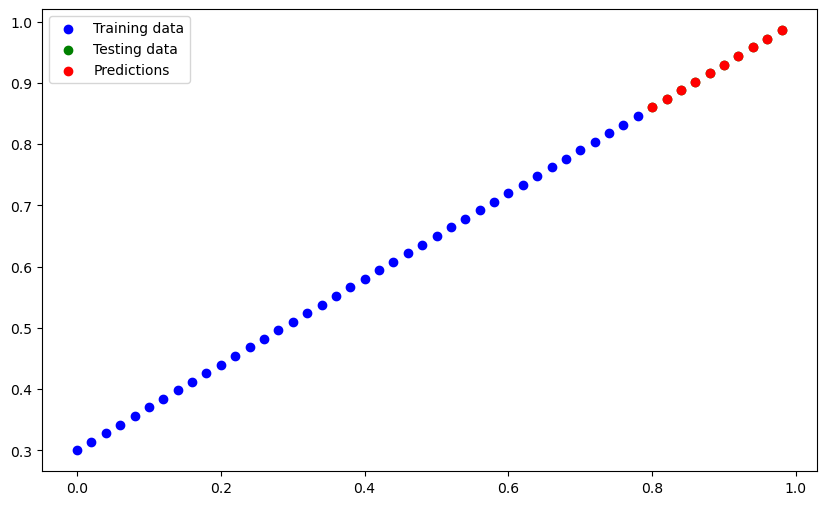

In [22]:
plot_predictions(predictions = y_preds)

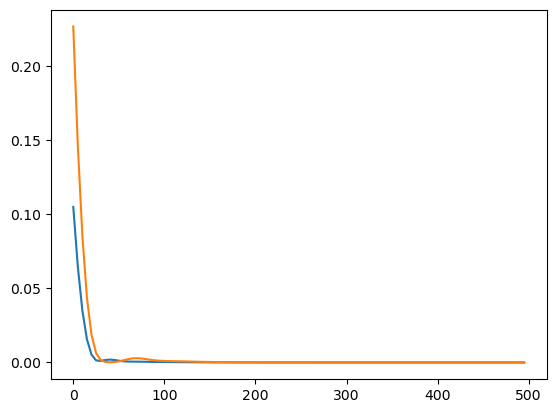

In [23]:
plt.plot(epoch_count, loss_values, label = "Training Loss") # blue
plt.plot(epoch_count, test_loss_values, label = "Testing Loss") # orange
plt.show()

## Saving a model in pytorch

There are 3 main methods:

1. `torch.save()` - Allows you to save PyTorch object in the python pickle format
2. `torch.load()` - Allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict` - This allows you to load a model's saved state dictionary


#### Saving and loading the entire model


**Pros**:
* Ease of Use: It saves the entire model, including the architecture and parameters, making it straightforward to load and use.
* No Need to Redefine Model: When loading, you don’t need to redefine the model architecture; it's automatically included.

**Cons**:
* Less Flexible: If you want to make changes to the model architecture or only load parts of the model, this method is less flexible.
* Potential Compatibility Issues: If there are changes in the PyTorch version or if the model code changes, loading the model might fail.
* Larger File Size: The saved file includes more information, which can increase the file size.


#### Saving and loading the state dict
**Pros**:
* Flexibility: You can modify the model architecture and still load the pre-trained weights.
* Compatibility: More robust to changes in the PyTorch version or model code.
* Smaller File Size: Only the model parameters are saved, leading to smaller files.
* Partial Loading: You can load only specific parts of the model's state_dict if needed.

**Cons**:
* Need to Redefine Model: When loading, you must define the model architecture in your code.
* Potential for Human Error: If the architecture doesn’t exactly match the saved state_dict, loading might fail.




#### In conclusion
* **Entire Model**: Useful for quick prototyping, sharing complete models, or when model architecture is unlikely to change.
* **State Dict**: Preferred for long-term storage, model updates, or when sharing models across different environments or PyTorch versions. It's generally the more robust and flexible method.

In [24]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

WindowsPath('models/01_pytorch_workflow_model.pth')

In [25]:
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving model to models\01_pytorch_workflow_model.pth


In [26]:
### Loading a ptorch model

loaded_model_0 = LinerRegressionModel()
print(loaded_model_0.state_dict())

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])


In [27]:
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
print(loaded_model_0.state_dict())

OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3000]))])


C:\Users\dixit\AppData\Local\Temp\ipykernel_24480\812121005.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))


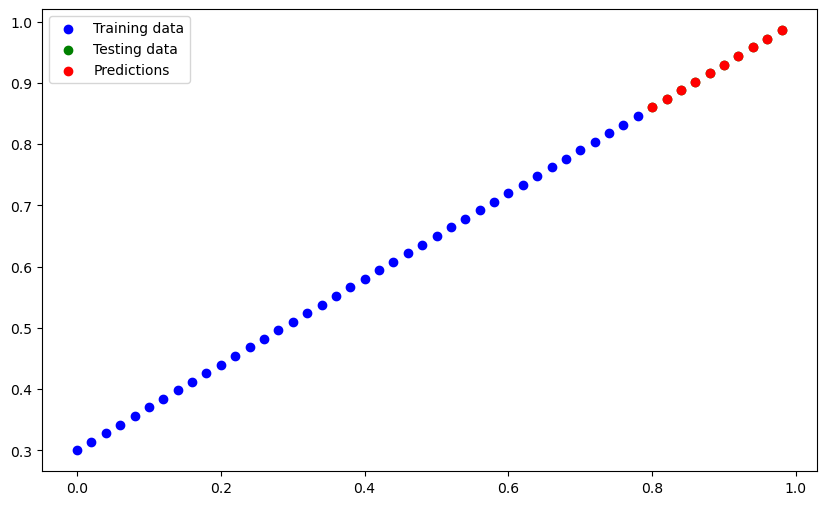

In [28]:
loaded_model_0.eval()
with torch.inference_mode():
    y_preds = loaded_model_0(X_test)

plot_predictions(predictions = y_preds)